In [1]:
import re
from TextCleaner import TextCleaner
import pandas as pd
import numpy as np
import time
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sn
import keras_metrics as km
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from numpy import sqrt 
%matplotlib inline
import nltk
from langdetect import detect
import contractions
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from wordcloud import WordCloud
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import PorterStemmer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU, SimpleRNN, SpatialDropout1D
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding
from tensorflow.python.keras.metrics import Metric
import tensorflow as tf    
import tensorflow_addons as tfa
from tensorflow import keras 
from keras.metrics import Precision, Recall

# Classifiers
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.naive_bayes import (
    BernoulliNB,
    ComplementNB,
    MultinomialNB,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
df = pd.read_csv('sentiment.csv')
df = df.drop(df.columns[0], axis=1)
df

,Author,Text,Time,Like Count,Currency ISO Code,Url,target
0,yusobays,@elonmusk @elonmusk please Come to TRY₺ #turk...,2021-01-31 22:21:58+00:00,1,TRY,https://twitter.com/yusobays/status/1356004827...,0.0
1,BtcTurkDestek,"@DrBatal Hello, if you have registered using ...",2021-01-30 18:07:15+00:00,0,TRY,https://twitter.com/BtcTurkDestek/status/13555...,0.0
2,RisingValhalla,“I trade weekly bars. You?”\n\n200 day moving ...,2021-01-30 03:29:59+00:00,0,TRY,https://twitter.com/RisingValhalla/status/1355...,0.0
3,Erda55203615,@elonmusk Try turkish lira its at the bottom m...,2021-01-29 20:20:49+00:00,0,TRY,https://twitter.com/Erda55203615/status/135524...,-1.0
4,Erda55203615,@ImTooRealForU TRY FUCKING TURKISH LIRA,2021-01-29 20:19:36+00:00,0,TRY,https://twitter.com/Erda55203615/status/135524...,-1.0
...,...,...,...,...,...,...,...
1944,flyingstocksman,For those of you who missed it last night with...,2021-01-01 09:24:17+00:00,0,GBP,https://twitter.com/flyingstocksman/status/134...,0.0
1945,alpeshbp,GBP/USD Weekly Price Forecast – The British Po...,2021-01-01 07:13:32+00:00,0,GBP,https://twitter.com/alpeshbp/status/1344904575...,0.0
1946,campsbay_com,"20.0142 ZAR for 1 GBP @ December 31, 2020 at 0...",2021-01-01 04:20:02+00:00,0,GBP,https://twitter.com/campsbay_com/status/134486...,0.0
1947,MajorFXNow,GBP/EUR: Pound Lifted by UK Approval of AstraZ...,2021-01-01 02:32:32+00:00,0,GBP,https://twitter.com/MajorFXNow/status/13448338...,0.0


In [3]:
def sentiments(df):
    if df['target'] >= 0:
        return 'Positive'
    elif df['target'] < 0:
        return 'Negative'      

In [4]:
df['Sentiment'] = df.apply(sentiments, axis=1)

In [5]:
df

,Author,Text,Time,Like Count,Currency ISO Code,Url,target,Sentiment
0,yusobays,@elonmusk @elonmusk please Come to TRY₺ #turk...,2021-01-31 22:21:58+00:00,1,TRY,https://twitter.com/yusobays/status/1356004827...,0.0,Positive
1,BtcTurkDestek,"@DrBatal Hello, if you have registered using ...",2021-01-30 18:07:15+00:00,0,TRY,https://twitter.com/BtcTurkDestek/status/13555...,0.0,Positive
2,RisingValhalla,“I trade weekly bars. You?”\n\n200 day moving ...,2021-01-30 03:29:59+00:00,0,TRY,https://twitter.com/RisingValhalla/status/1355...,0.0,Positive
3,Erda55203615,@elonmusk Try turkish lira its at the bottom m...,2021-01-29 20:20:49+00:00,0,TRY,https://twitter.com/Erda55203615/status/135524...,-1.0,Negative
4,Erda55203615,@ImTooRealForU TRY FUCKING TURKISH LIRA,2021-01-29 20:19:36+00:00,0,TRY,https://twitter.com/Erda55203615/status/135524...,-1.0,Negative
...,...,...,...,...,...,...,...,...
1944,flyingstocksman,For those of you who missed it last night with...,2021-01-01 09:24:17+00:00,0,GBP,https://twitter.com/flyingstocksman/status/134...,0.0,Positive
1945,alpeshbp,GBP/USD Weekly Price Forecast – The British Po...,2021-01-01 07:13:32+00:00,0,GBP,https://twitter.com/alpeshbp/status/1344904575...,0.0,Positive
1946,campsbay_com,"20.0142 ZAR for 1 GBP @ December 31, 2020 at 0...",2021-01-01 04:20:02+00:00,0,GBP,https://twitter.com/campsbay_com/status/134486...,0.0,Positive
1947,MajorFXNow,GBP/EUR: Pound Lifted by UK Approval of AstraZ...,2021-01-01 02:32:32+00:00,0,GBP,https://twitter.com/MajorFXNow/status/13448338...,0.0,Positive


In [6]:
data_v1 = df[['Text','Sentiment']]
data_v1.isnull().sum()

Text         0
Sentiment    0
dtype: int64

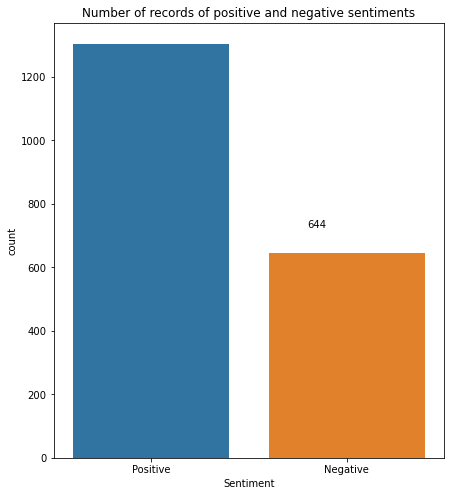

In [7]:
plt.figure(figsize=(7,8))
plt.title("Number of records of positive and negative sentiments")
plot = sn.countplot(x = 'Sentiment', data = data_v1)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + 0.2 ,p.get_height()+80))

In [8]:
clean = TextCleaner()
text = clean.convert_emoji_to_text("Hilarious 😂. The feeling of making a sale 😎, The feeling of actually fulfilling orders 😒")
print(text)

text4 = "Hello :-) :-)"
resp = clean.convert_emoticons(text4)
print(resp)

Hilarious face with tears of joy. The feeling of making a sale smiling face with sunglasses, The feeling of actually fulfilling orders unamused face
Hello Happy face smiley Happy face smiley


In [9]:
df

,Author,Text,Time,Like Count,Currency ISO Code,Url,target,Sentiment
0,yusobays,@elonmusk @elonmusk please Come to TRY₺ #turk...,2021-01-31 22:21:58+00:00,1,TRY,https://twitter.com/yusobays/status/1356004827...,0.0,Positive
1,BtcTurkDestek,"@DrBatal Hello, if you have registered using ...",2021-01-30 18:07:15+00:00,0,TRY,https://twitter.com/BtcTurkDestek/status/13555...,0.0,Positive
2,RisingValhalla,“I trade weekly bars. You?”\n\n200 day moving ...,2021-01-30 03:29:59+00:00,0,TRY,https://twitter.com/RisingValhalla/status/1355...,0.0,Positive
3,Erda55203615,@elonmusk Try turkish lira its at the bottom m...,2021-01-29 20:20:49+00:00,0,TRY,https://twitter.com/Erda55203615/status/135524...,-1.0,Negative
4,Erda55203615,@ImTooRealForU TRY FUCKING TURKISH LIRA,2021-01-29 20:19:36+00:00,0,TRY,https://twitter.com/Erda55203615/status/135524...,-1.0,Negative
...,...,...,...,...,...,...,...,...
1944,flyingstocksman,For those of you who missed it last night with...,2021-01-01 09:24:17+00:00,0,GBP,https://twitter.com/flyingstocksman/status/134...,0.0,Positive
1945,alpeshbp,GBP/USD Weekly Price Forecast – The British Po...,2021-01-01 07:13:32+00:00,0,GBP,https://twitter.com/alpeshbp/status/1344904575...,0.0,Positive
1946,campsbay_com,"20.0142 ZAR for 1 GBP @ December 31, 2020 at 0...",2021-01-01 04:20:02+00:00,0,GBP,https://twitter.com/campsbay_com/status/134486...,0.0,Positive
1947,MajorFXNow,GBP/EUR: Pound Lifted by UK Approval of AstraZ...,2021-01-01 02:32:32+00:00,0,GBP,https://twitter.com/MajorFXNow/status/13448338...,0.0,Positive


In [10]:
def remove_url(text):
    result = re.sub(r'https?:\/\/\S*', '', text, flags=re.MULTILINE)
    return result

def replace_contractions(text):
    return contractions.fix(text)

abbs =  {"eur": "euro", "usd": "dollar", "gbp" : "pound", "u":"you", "tryeur":"turkish lira euro", "try":" turkish lira", "gt":"greater than","lt": "less than","btc":"bitcoin",
        "gbpusd": "pound dollar", "usdtry":"dollar turkish lira", "fx":"forex", "u":"you", "eurusd":"euro usd", "eurgbp":"euro pound", "jpy":"japanese yen","cny":"chinese yuan","uk":"united kingdom"}

def replace_currency(text):
    val = ''
    for i in text.split():
        if abbs.get(i.lower().strip()) is not None:
            #print(abbs.get(i.lower().strip()))
            val = val + str(abbs.get(i.lower().strip())) + ' '
        else:
            val = val + i + ' '
    return val

In [11]:
print(remove_url(df['Text'].iloc[1942]))

Visit  to check the latest #bitcoin price in #gbp #uk #pound. You can also use our free $GBP to $BTC price converter.


In [12]:
print(replace_currency("@elonmusk Try turkish lira its at the bottom"))

@elonmusk  turkish lira turkish lira its at the bottom 


In [13]:
clean = TextCleaner()

def cleaning(df_cl, stop_words):
    
    # Removing URLs
    df_cl["Text"] = df_cl["Text"].apply(lambda x: remove_url(x))
    
     # Removing mentioned author names
    df_cl["Text"] = df_cl["Text"].apply(lambda x: re.sub("@[A-Za-z0-9]+","", x))
    
    # Lowercase
    df_cl['Text'] = df_cl['Text'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
    
    df_cl["Text"] = df_cl["Text"].apply(lambda x: replace_contractions(x))
    
    df_cl["Text"] = df_cl["Text"].apply(lambda x: replace_currency(x))
    
     # Remove Non -letters
    df_cl['Text'] = df_cl['Text'].apply(lambda x: re.sub(r"[^a-zA-Z0-9]", ' ', x))
    
    # Removing Punctuation
    df_cl["Text"] = df_cl["Text"].apply(lambda x: re.sub(r'[^\w\s]','', x))
    
    # Removing stop words
    df_cl['Text'] = df_cl['Text'].apply(lambda x:' '.join(x for x in x.split() if x not in stop_words))
    
    # Lemmatization
    df_cl['Text'] = df_cl['Text'].apply(lambda x:' '.join([Word(x).lemmatize() for x in x.split()]))
    
    # Emoticons
    df_cl['Text'] = df_cl['Text'].apply(lambda x: clean.convert_emoji_to_text(x))
    
    # Emojis
    df_cl['Text'] = df_cl['Text'].apply(lambda x: clean.convert_emoji_to_text(x))    
    
    # Stemming
    #df_cl['Text'] = df_cl['Text'].apply(lambda x: port_stemmer(x))
    return df_cl

stop_words = stopwords.words('english')

In [14]:
data_v1 = cleaning(data_v1, stop_words)

In [15]:
data_v1

,Text,Sentiment
0,please come try turkishlira,Positive
1,hello registered using turkish citizenship id ...,Positive
2,trade weekly bar 200 day moving average breach...,Positive
3,turkish lira turkish lira bottom maybe would go,Negative
4,turkish lira fucking turkish lira,Negative
...,...,...
1944,missed last night nye potentially important tw...,Positive
1945,gbp usd weekly price forecast british pound lo...,Positive
1946,20 0142 zar 1 pound december 31 2020 06 20am s...,Positive
1947,gbp eur pound lifted united kingdom approval a...,Positive


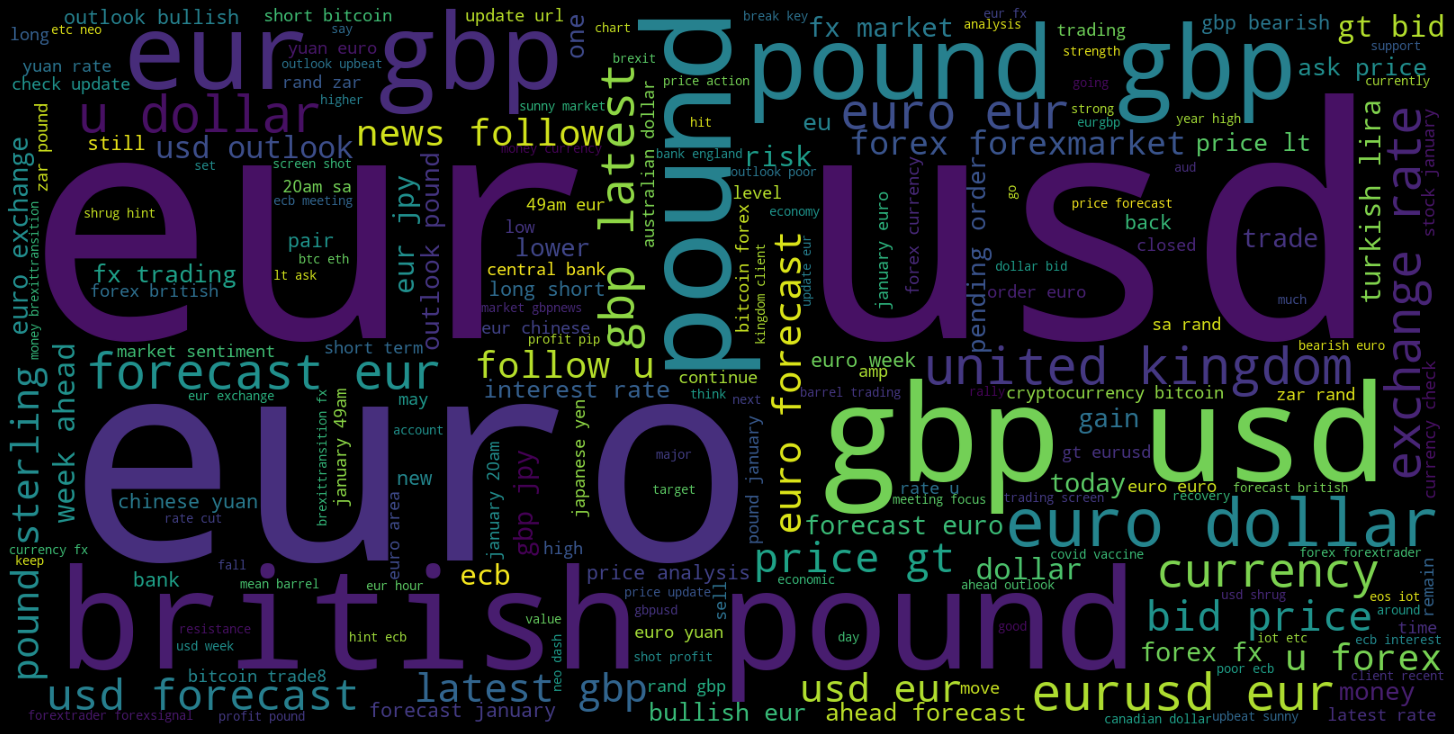

In [16]:
common_words = ''
for i in data_v1.Text:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens)+" "
wordcloud = WordCloud(width=1600, height=800).generate(common_words)
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [17]:
lb = LabelEncoder()
data_v1['Sentiment'] = lb.fit_transform(data_v1['Sentiment'])

In [39]:
tokenizer = Tokenizer(num_words=1000, split=' ', lower=True) 
tokenizer.fit_on_texts(data_v1['Text'].values)
X = tokenizer.texts_to_sequences(df['Text'].values)
X = pad_sequences(X)

In [40]:
y = pd.get_dummies(data_v1['Sentiment'])

In [41]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

<h3>Time Series Methodologies</h3>
<h4>Defining Models</h4>

In [46]:
models = [ 'SimpleRNN', 'LSTM', 'GRU']

In [42]:
METRICS = [ 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      km.binary_precision(), 
      km.binary_recall(),
      'mse', 
      'mae', 
      keras.metrics.AUC(name='auc'),
      tfa.metrics.F1Score(num_classes=2, threshold=0.5, average='macro'),
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn')
]

In [43]:
def build_model(nb_words, _model="SimpleRNN", embedding_matrix=None):
    model = Sequential()
    model.add(Embedding(input_dim=1000, output_dim=64, input_length = nb_words))
    if _model == "SimpleRNN":
        model.add(SimpleRNN(128, dropout=0.1, recurrent_dropout=0.1, activation='relu'))
    elif _model == "LSTM":
        model.add(LSTM(100, return_sequences=True))
        model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.1, activation='relu'))
    elif _model == "GRU":
        model.add(GRU(128))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[METRICS])
    return model

In [24]:
print(X.shape)
print(y.shape)

(1949, 38)
(1949, 2)


Model : SimpleRNN
Model Summary
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 38, 64)            64000     
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 128)               24704     
                                                                 
 dense_4 (Dense)             (None, 2)                 258       
                                                                 
Total params: 88,962
Trainable params: 88,962
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass shuffle=True, random_state=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


/opt/anaconda3/lib/python3.9/site-packages/keras_metrics/metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


20/20 [==============================] - 3s 43ms/step - loss: 0.6468 - accuracy: 0.6591 - precision: 0.6069 - recall: 0.0489 - mse: 0.2249 - mae: 0.4442 - auc: 0.6923 - f1_score: 0.4350 - tp: 1079.0000 - fp: 558.0000 - tn: 1079.0000 - fn: 558.0000 - val_loss: 0.6482 - val_accuracy: 0.6603 - val_precision: 0.6069 - val_recall: 0.0480 - val_mse: 0.2278 - val_mae: 0.4662 - val_auc: 0.6654 - val_f1_score: 0.3977 - val_tp: 206.0000 - val_fp: 106.0000 - val_tn: 206.0000 - val_fn: 106.0000
Epoch 2/5
20/20 [==============================] - 0s 12ms/step - loss: 0.6381 - accuracy: 0.6712 - precision: 0.6069 - recall: 0.0471 - mse: 0.2229 - mae: 0.4583 - auc: 0.6861 - f1_score: 0.4016 - tp: 837.0000 - fp: 410.0000 - tn: 837.0000 - fn: 410.0000 - val_loss: 0.6425 - val_accuracy: 0.6603 - val_precision: 0.6069 - val_recall: 0.0463 - val_mse: 0.2251 - val_mae: 0.4443 - val_auc: 0.6727 - val_f1_score: 0.3977 - val_tp: 206.0000 - val_fp: 106.0000 - val_tn: 206.0000 - val_fn: 106.0000
Epoch 3/5
20/20 

20/20 [==============================] - 0s 12ms/step - loss: 0.6281 - accuracy: 0.6768 - precision: 0.6059 - recall: 0.0367 - mse: 0.2182 - mae: 0.4374 - auc: 0.6946 - f1_score: 0.4306 - tp: 844.0000 - fp: 403.0000 - tn: 844.0000 - fn: 403.0000 - val_loss: 0.6460 - val_accuracy: 0.6538 - val_precision: 0.6064 - val_recall: 0.0367 - val_mse: 0.2266 - val_mae: 0.4422 - val_auc: 0.6637 - val_f1_score: 0.4040 - val_tp: 204.0000 - val_fp: 108.0000 - val_tn: 204.0000 - val_fn: 108.0000
Epoch 4/5
20/20 [==============================] - 0s 12ms/step - loss: 0.6230 - accuracy: 0.6824 - precision: 0.6076 - recall: 0.0366 - mse: 0.2159 - mae: 0.4323 - auc: 0.7037 - f1_score: 0.4436 - tp: 851.0000 - fp: 396.0000 - tn: 851.0000 - fn: 396.0000 - val_loss: 0.6473 - val_accuracy: 0.6538 - val_precision: 0.6091 - val_recall: 0.0366 - val_mse: 0.2270 - val_mae: 0.4390 - val_auc: 0.6623 - val_f1_score: 0.4040 - val_tp: 204.0000 - val_fp: 108.0000 - val_tn: 204.0000 - val_fn: 108.0000
Epoch 5/5
20/20 [=

Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5


/opt/anaconda3/lib/python3.9/site-packages/keras_metrics/metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


20/20 [==============================] - 6s 132ms/step - loss: 0.6433 - accuracy: 0.6524 - precision: 0.6015 - recall: 0.0487 - mse: 0.2252 - mae: 0.4470 - auc: 0.6851 - f1_score: 0.4415 - tp: 1068.0000 - fp: 569.0000 - tn: 1068.0000 - fn: 569.0000 - val_loss: 0.6457 - val_accuracy: 0.6603 - val_precision: 0.6015 - val_recall: 0.0483 - val_mse: 0.2266 - val_mae: 0.4640 - val_auc: 0.6691 - val_f1_score: 0.3977 - val_tp: 206.0000 - val_fp: 106.0000 - val_tn: 206.0000 - val_fn: 106.0000
Epoch 2/5
20/20 [==============================] - 2s 80ms/step - loss: 0.6369 - accuracy: 0.6712 - precision: 0.6015 - recall: 0.0478 - mse: 0.2223 - mae: 0.4496 - auc: 0.6834 - f1_score: 0.4016 - tp: 837.0000 - fp: 410.0000 - tn: 837.0000 - fn: 410.0000 - val_loss: 0.6468 - val_accuracy: 0.6603 - val_precision: 0.6015 - val_recall: 0.0474 - val_mse: 0.2269 - val_mae: 0.4326 - val_auc: 0.6714 - val_f1_score: 0.3977 - val_tp: 206.0000 - val_fp: 106.0000 - val_tn: 206.0000 - val_fn: 106.0000
Epoch 3/5
20/20

20/20 [==============================] - 2s 115ms/step - loss: 0.6310 - accuracy: 0.6712 - precision: 0.5969 - recall: 0.0400 - mse: 0.2196 - mae: 0.4384 - auc: 0.6871 - f1_score: 0.4108 - tp: 837.0000 - fp: 410.0000 - tn: 837.0000 - fn: 410.0000 - val_loss: 0.6459 - val_accuracy: 0.6506 - val_precision: 0.5964 - val_recall: 0.0398 - val_mse: 0.2268 - val_mae: 0.4413 - val_auc: 0.6749 - val_f1_score: 0.3942 - val_tp: 203.0000 - val_fp: 109.0000 - val_tn: 203.0000 - val_fn: 109.0000
Epoch 4/5
20/20 [==============================] - 2s 118ms/step - loss: 0.6307 - accuracy: 0.6712 - precision: 0.5958 - recall: 0.0395 - mse: 0.2195 - mae: 0.4382 - auc: 0.6873 - f1_score: 0.4108 - tp: 837.0000 - fp: 410.0000 - tn: 837.0000 - fn: 410.0000 - val_loss: 0.6458 - val_accuracy: 0.6506 - val_precision: 0.5952 - val_recall: 0.0393 - val_mse: 0.2267 - val_mae: 0.4412 - val_auc: 0.6757 - val_f1_score: 0.3942 - val_tp: 203.0000 - val_fp: 109.0000 - val_tn: 203.0000 - val_fn: 109.0000
Epoch 5/5
20/20 

/opt/anaconda3/lib/python3.9/site-packages/keras_metrics/metrics.py:26: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return object.__getattribute__(self, name)


20/20 [==============================] - 4s 60ms/step - loss: 0.6422 - accuracy: 0.6567 - precision: 0.5755 - recall: 0.0353 - mse: 0.2247 - mae: 0.4446 - auc: 0.6848 - f1_score: 0.4310 - tp: 1075.0000 - fp: 562.0000 - tn: 1075.0000 - fn: 562.0000 - val_loss: 0.6455 - val_accuracy: 0.6603 - val_precision: 0.5755 - val_recall: 0.0351 - val_mse: 0.2263 - val_mae: 0.4357 - val_auc: 0.6677 - val_f1_score: 0.3977 - val_tp: 206.0000 - val_fp: 106.0000 - val_tn: 206.0000 - val_fn: 106.0000
Epoch 2/5
20/20 [==============================] - 0s 24ms/step - loss: 0.6352 - accuracy: 0.6712 - precision: 0.5755 - recall: 0.0348 - mse: 0.2215 - mae: 0.4483 - auc: 0.6732 - f1_score: 0.4016 - tp: 837.0000 - fp: 410.0000 - tn: 837.0000 - fn: 410.0000 - val_loss: 0.6422 - val_accuracy: 0.6603 - val_precision: 0.5755 - val_recall: 0.0346 - val_mse: 0.2250 - val_mae: 0.4450 - val_auc: 0.6711 - val_f1_score: 0.3977 - val_tp: 206.0000 - val_fp: 106.0000 - val_tn: 206.0000 - val_fn: 106.0000
Epoch 3/5
20/20 

20/20 [==============================] - 0s 25ms/step - loss: 0.6298 - accuracy: 0.6744 - precision: 0.5751 - recall: 0.0317 - mse: 0.2190 - mae: 0.4371 - auc: 0.6885 - f1_score: 0.4166 - tp: 841.0000 - fp: 406.0000 - tn: 841.0000 - fn: 406.0000 - val_loss: 0.6450 - val_accuracy: 0.6571 - val_precision: 0.5752 - val_recall: 0.0316 - val_mse: 0.2263 - val_mae: 0.4397 - val_auc: 0.6792 - val_f1_score: 0.4053 - val_tp: 205.0000 - val_fp: 107.0000 - val_tn: 205.0000 - val_fn: 107.0000
Epoch 4/5
20/20 [==============================] - 1s 25ms/step - loss: 0.6291 - accuracy: 0.6744 - precision: 0.5753 - recall: 0.0315 - mse: 0.2187 - mae: 0.4366 - auc: 0.6911 - f1_score: 0.4188 - tp: 841.0000 - fp: 406.0000 - tn: 841.0000 - fn: 406.0000 - val_loss: 0.6452 - val_accuracy: 0.6571 - val_precision: 0.5754 - val_recall: 0.0314 - val_mse: 0.2263 - val_mae: 0.4390 - val_auc: 0.6759 - val_f1_score: 0.4053 - val_tp: 205.0000 - val_fp: 107.0000 - val_tn: 205.0000 - val_fn: 107.0000
Epoch 5/5
20/20 [=

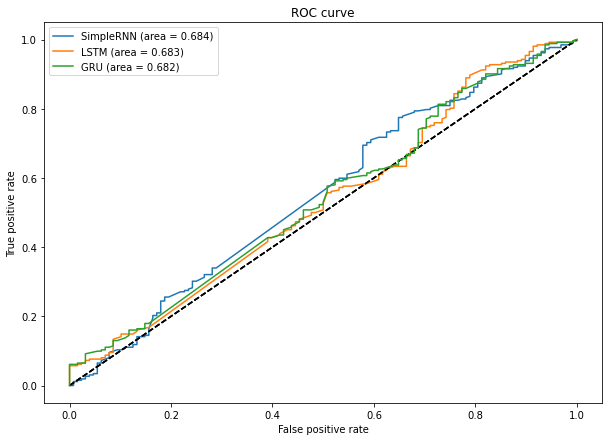

In [47]:
output_df = pd.DataFrame(columns=['model', 'accuracy', 'precision', 'recall', 'mse', 'mae', 'auc', 'f1_score', 'prediction time'])

seed = 5
kfold = KFold(seed, True, 7)
cvscores = []

batch_size = 64

x1=np.array(X)
y1=np.array(y)

for idx, mdl in enumerate(models):
    accuracy = precision = recall = mse = mae = auc = f1_score_val = prediction_time = 0
    
    print("Model : " + str(mdl))
    model_ = build_model(X.shape[1], mdl, None)
    print("Model Summary")
    print(model_.summary())
    
    for train, test in kfold.split(x1,y1):
        X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.2, random_state = 0)
        model_.fit(X_train, y_train, epochs=5, validation_split=0.2, batch_size=batch_size, verbose = 'auto', shuffle=False, validation_data=(X_test,y_test))
    
        start_time = time.time()
        y_pred = model_.predict(X_test)
        end_time = time.time() - start_time
        print("")

        scores = model_.evaluate(X_test, y_test)
        print("%s: %.2f%%" % (model_.metrics_names[1], scores[1]*100))    
        print("")
        accuracy += scores[1]
        precision += scores[2]
        recall += scores[3]
        mse += scores[4]
        mae += scores[5]
        auc += scores[6]
        f1_score_val += scores[7]
        prediction_time += end_time
        
        #print("")
        #print("Time taken to predict the model " + str(end_time))

    output_df = output_df.append([{'model': str(mdl), 'accuracy':accuracy/seed,'precision':precision/seed
                                       ,'recall':recall/seed,'mse':mse/seed,'mae':mae/seed
                                       ,'auc':auc/seed,'f1_score':f1_score_val/seed, 'prediction time': prediction_time/seed}], ignore_index=True)

    yhat = model_.predict_on_batch(X_test)
    #print("yhat[:,1]",yhat[:,1])
    #print("y_test",y_test)
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test[:,1], yhat[:,1])
    plt.rcParams["figure.figsize"] = (10,7)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_rf, tpr_rf, label=str(mdl) + ' (area = {:.3f})'.format(auc/seed))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.savefig('tsa_roc_curve.png')

    #print(classification_report(y_test.values.argmax(axis=1), y_pred.argmax(axis=1)))
    print("___________________________________________________________________________________")

    print("")
    print("")
    print("")
    
plt.show()

In [48]:
output_df

,model,accuracy,precision,recall,mse,mae,auc,f1_score,prediction time
0,SimpleRNN,0.666667,0.609148,0.041336,0.221566,0.430488,0.683619,0.440116,0.068217
1,LSTM,0.671795,0.593003,0.039330,0.219570,0.433892,0.682777,0.413455,0.338407
2,GRU,0.672308,0.574251,0.031864,0.221100,0.432803,0.681696,0.424457,0.126833


<h3>Traditional Methodologies</h3>

In [27]:
stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()
def stemmed_words(doc):
    stemmed_words = [stemmer.stem(w) for w in analyzer(doc)]
    non_stop_words = [word for word in stemmed_words]
    return non_stop_words

In [28]:
count_vectorizer = CountVectorizer(stop_words= stop_words, max_features= 1000)
feature_vector = count_vectorizer.fit(data_v1['Text'])
train_ds_features = count_vectorizer.transform(data_v1['Text'])
features = feature_vector.get_feature_names()
features_counts = np.sum(train_ds_features.toarray(), axis = 0)
features_counts = pd.DataFrame(dict(features =  features, counts = features_counts))
features_counts = features_counts.sort_values("counts", ascending= False)[0:15]
features_counts

,features,counts
333,euro,1461
329,eur,1374
675,pound,1217
420,gbp,1119
924,usd,1055
297,dollar,580
381,forex,410
379,forecast,384
187,british,374
684,price,364


In [29]:
train_x, test_x, train_y, test_y =  train_test_split(train_ds_features, data_v1['Sentiment'], test_size = 0.3, random_state = 42)

In [30]:
x = train_ds_features
y = data_v1['Sentiment']

In [31]:
classifiers = {
    "BernoulliNB": BernoulliNB(),
    "ComplementNB": ComplementNB(),
    "MultinomialNB": MultinomialNB(),
    "LogisticRegression": LogisticRegression(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "MLPClassifier": MLPClassifier(max_iter=1000),
    "AdaBoostClassifier": AdaBoostClassifier()
}

Classifier :  BernoulliNB
              precision    recall  f1-score   support

           0       0.54      0.59      0.57       138
           1       0.76      0.72      0.74       252

    accuracy                           0.68       390
   macro avg       0.65      0.66      0.65       390
weighted avg       0.69      0.68      0.68       390


Time taken to predict the model 0.002392292022705078

              precision    recall  f1-score   support

           0       0.46      0.49      0.48       102
           1       0.82      0.80      0.81       288

    accuracy                           0.72       390
   macro avg       0.64      0.64      0.64       390
weighted avg       0.72      0.72      0.72       390


Time taken to predict the model 0.003986835479736328

              precision    recall  f1-score   support

           0       0.61      0.61      0.61       140
           1       0.78      0.78      0.78       250

    accuracy                           0.72   

________________________________________________________


Classifier :  DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.59      0.54      0.56       138
           1       0.76      0.79      0.78       252

    accuracy                           0.70       390
   macro avg       0.67      0.66      0.67       390
weighted avg       0.70      0.70      0.70       390


Time taken to predict the model 0.0026569366455078125

              precision    recall  f1-score   support

           0       0.45      0.49      0.47       102
           1       0.81      0.78      0.80       288

    accuracy                           0.71       390
   macro avg       0.63      0.64      0.63       390
weighted avg       0.72      0.71      0.71       390


Time taken to predict the model 0.0017371177673339844

              precision    recall  f1-score   support

           0       0.59      0.62      0.60       140
           1       0.78      

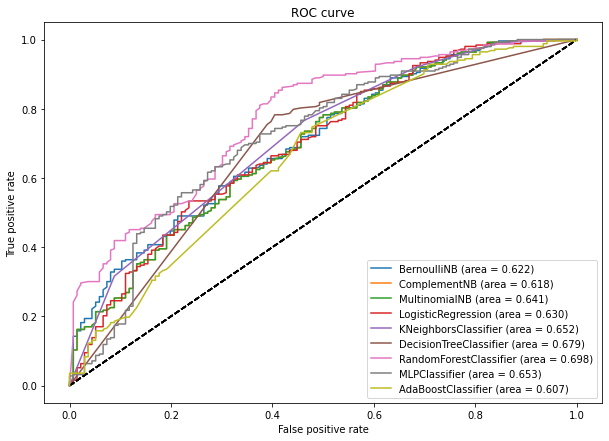

In [32]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

for name, sklearn_classifier in classifiers.items():
    print("Classifier : ", name)
    accuracy = precision = recall = mse = mae = auc = f1_score_val = prediction_time = 0
    
    for train_index, test_index in kfold.split(x):
        train_x, test_x, train_y, test_y = x[train_index], x[test_index], y[train_index], y[test_index]       
    
        sklearn_classifier.fit(train_x.toarray(), train_y)
        start_time = time.time()
        test_ds_predicted = sklearn_classifier.predict(test_x.toarray())
        end_time = time.time() - start_time
        print(metrics.classification_report(test_y, test_ds_predicted))
        print("")
        print("Time taken to predict the model " + str(end_time))
        print("")
        tr_mae = mean_absolute_error(test_y, test_ds_predicted)
        tr_mse = mean_squared_error(test_y, test_ds_predicted)
        tr_accuracy = accuracy_score(test_y, test_ds_predicted)
        tr_f1_score = f1_score(test_y, test_ds_predicted, average='weighted')
        tr_recall = recall_score(test_y, test_ds_predicted, average='weighted')
        tr_precision = precision_score(test_y, test_ds_predicted, average='weighted')
        tr_auc = roc_auc_score(test_y, test_ds_predicted)

        accuracy += tr_accuracy
        precision += tr_precision
        recall += tr_recall
        mse += tr_mse
        mae += tr_mae
        auc += tr_auc
        f1_score_val += tr_f1_score
        prediction_time += end_time
    #print('MAE: %f' % mean_absolute_error(test_y, test_ds_predicted))
    #print('MSE: %f' % mean_squared_error(test_y, test_ds_predicted))
    #print('RMSE: %f' % sqrt(mean_squared_error(test_y, test_ds_predicted)))
    
    
    output_df = output_df.append([{'model': str(name), 'accuracy':accuracy/seed,'precision':precision/seed
                                       ,'recall':recall/seed,'mse':mse/seed,'mae':mae/seed
                                       ,'auc':auc/seed,'f1_score':f1_score_val/seed, 'prediction time': prediction_time/seed}], ignore_index=True)

    yhat = sklearn_classifier.predict_proba(test_x.toarray())
    fpr_rf, tpr_rf, threshold2 = roc_curve(test_y.to_numpy(), yhat[:,1])
    plt.rcParams["figure.figsize"] = (10,7)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_rf, tpr_rf, label=str(name) + ' (area = {:.3f})'.format(tr_auc))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.savefig('td_roc_curve.png')
    
    print("________________________________________________________")
    print("")
    print("")
plt.show()

In [33]:
output_df

,model,accuracy,precision,recall,mse,mae,auc,f1_score,prediction time
0,SimpleRNN,0.673846,0.458737,0.015295,0.242141,0.387149,0.685030,0.419723,0.123919
1,BernoulliNB,0.695722,0.699594,0.695722,0.304278,0.304278,0.659656,0.697312,0.003460
2,ComplementNB,0.683404,0.703822,0.683404,0.316596,0.316596,0.668479,0.690060,0.001743
3,MultinomialNB,0.703426,0.704713,0.703426,0.296574,0.296574,0.664243,0.703886,0.003003
4,LogisticRegression,0.718815,0.707197,0.718815,0.281185,0.281185,0.653870,0.708709,0.002093
5,KNeighborsClassifier,0.695737,0.693563,0.695737,0.304263,0.304263,0.644164,0.691724,0.030792
6,DecisionTreeClassifier,0.709597,0.710537,0.709597,0.290403,0.290403,0.669604,0.709702,0.001798
7,RandomForestClassifier,0.747054,0.737488,0.747054,0.252946,0.252946,0.677161,0.734694,0.019965
8,MLPClassifier,0.713692,0.709117,0.713692,0.286308,0.286308,0.665882,0.710796,0.002676
9,AdaBoostClassifier,0.720359,0.709952,0.720359,0.279641,0.279641,0.617021,0.686860,0.033438


In [34]:
output_df.to_csv('classifiers_output_result.csv', sep='\t')